In [1]:
import glob
from itertools import chain

%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np

In [2]:
def read_metrics(path):
    eventfiles = sorted(glob.glob(path+'events.out.tfevents.*'))
    loss_steps = []
    loss = []
    perplexity_steps = []
    perplexity = []

    try:
        for this_file in eventfiles:    
            for e in tf.train.summary_iterator(this_file):
                for v in e.summary.value:
                    if v.tag == 'loss':
                        loss_steps = np.append(loss_steps,e.step)
                        loss = np.append(loss,v.simple_value)
                    elif v.tag == 'metrics/perplexity':
                        perplexity_steps = np.append(perplexity_steps,e.step)
                        perplexity = np.append(perplexity,v.simple_value)
    except:
        pass
    return loss_steps, loss, perplexity_steps, perplexity

In [29]:
basic_train_datapath = 'results/melody_rnn/logdir/basic/train/'
basic_eval_datapath = 'results/melody_rnn/logdir/basic/eval/'

basic_train_loss_steps, basic_train_loss, _, _ = read_metrics(basic_train_datapath)
basic_eval_loss_steps, basic_eval_loss, _, _ = read_metrics(basic_eval_datapath)

In [30]:
dropout_train_datapath = 'results/melody_rnn/logdir/dropout/train/'
dropout_eval_datapath = 'results/melody_rnn/logdir/dropout/eval/'

dropout_train_loss_steps, dropout_train_loss, _, _ = read_metrics(dropout_train_datapath)
dropout_eval_loss_steps, dropout_eval_loss, _, _ = read_metrics(dropout_eval_datapath)

In [34]:
ss_train_datapath = 'results/melody_rnn/logdir/scheduled-sampling/train/'
ss_eval_datapath = 'results/melody_rnn/logdir/scheduled-sampling/eval/'

ss_train_loss_steps, ss_train_loss, _, _ = read_metrics(ss_train_datapath)
ss_eval_loss_steps, ss_eval_loss, _, _ = read_metrics(ss_eval_datapath)

In [ ]:
pf_train_datapath = 'results/melody_rnn/logdir/professor-forcing/train/'
pf_eval_datapath = 'results/melody_rnn/logdir/professor-forcing/eval/'

pf_train_loss_steps, ss_train_loss, _, _ = read_metrics(pf_train_datapath)
pf_eval_loss_steps, ss_eval_loss, _, _ = read_metrics(pf_eval_datapath)

In [10]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

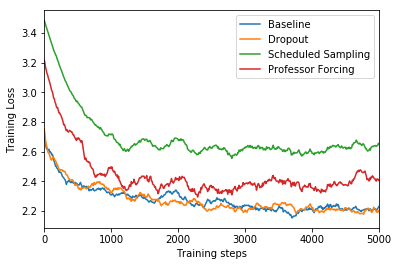

In [100]:
smooth_basic_train_loss = moving_average(basic_train_loss,n=20)
smooth_dropout_train_loss = moving_average(dropout_train_loss,n=20)
smooth_ss_train_loss = moving_average(ss_train_loss,n=20)
smooth_pf_train_loss = moving_average(pf_train_loss,n=20)

plt.figure()
plt.plot(basic_train_loss_steps[:-19],smooth_basic_train_loss,label='Baseline')
plt.plot(dropout_train_loss_steps[:-19],smooth_dropout_train_loss,label='Dropout')
plt.plot(ss_train_loss_steps[:-19],smooth_ss_train_loss,label='Scheduled Sampling')
plt.plot(pf_train_loss_steps[:-19],smooth_pf_train_loss,label='Professor Forcing')

plt.xlabel('Training steps')
plt.ylabel('Training Loss')
plt.xlim(0,5000)
plt.legend()
plt.savefig('figures/Training.png')

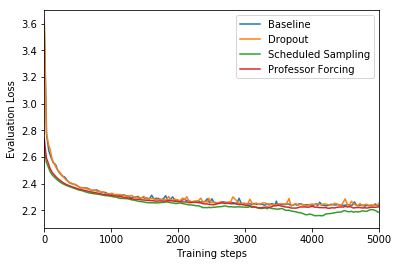

In [101]:
plt.figure()
plt.plot(basic_eval_loss_steps,basic_eval_loss,label='Baseline')
plt.plot(dropout_eval_loss_steps,dropout_eval_loss,label='Dropout')
plt.plot(ss_eval_loss_steps,ss_eval_loss,label='Scheduled Sampling')
plt.plot(pf_eval_loss_steps,pf_eval_loss,label='Professor Forcing')

plt.xlabel('Training steps')
plt.ylabel('Training Loss')
plt.xlim(0,5000)
plt.legend()
plt.savefig('figures/Training.png')